# 1.Criando os Nomes

In [ ]:
import pandas as pd

## 1.1 Importando uma tabela de um site em formato em Json

In [ ]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [ ]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


### 1.2 Colocando as 2 variáveis em uma lista

In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

## 1.3 Juntando as váriaveis, pegando apenas o resultado específico(nome)

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.sample(5)

,nome
113,VICENTE
160,LEILA
115,MILTON
99,WILLIAN
1,JOAO


# 2.Incluindo ID dos alunos

In [ ]:
import numpy as np
np.random.seed(123) #pelo menos uma sequencia de numeros aleatorios

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
#criando uma coluna [id_aluno] com a distribuição de números aleatórios somando com +1(onde compreende numeros de 1 a 400)
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [ ]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com'] #2 tipos de dominio
nomes['dominio'] = np.random.choice(dominios, total_alunos) #criamos uma coluna dominio, onde recebe valores de dominios aleatórios


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [ ]:
#criamos uma coluna email, fazendo a concatenação dos nomes com os dominios em letra minuscula
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# 3.Criando a tabelas Cursos

In [ ]:
#instalando 2 bibliotecas
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0] #criando um dataframe

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# 4.Alterando o index de Cursos

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'}) #renomeando nome do curso para nome_do_curso

In [ ]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [ ]:
cursos['id'] = cursos.index +1 #criando o id aleatório começando do numero 1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos= cursos.set_index('id') #removendo o id do index e deixando com o id aleatório

In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# 5.Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com
69,TEREZA,151,@servicodoemail.com,tereza@servicodoemail.com
105,PABLO,141,@dominiodoemail.com.br,pablo@dominiodoemail.com.br
109,CELSO,266,@servicodoemail.com,celso@servicodoemail.com


In [ ]:
#criando uma coluna| 
#np.ceil(ele arredonda os valores pra cima)
#np.random.exponentiral(gera valores exponencias aleatórios)(tamanho=total de alunos)
#astype(qual será o tipo dessa coluna)
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominiodoemail.com.br,leticia@dominiodoemail.com.br,2
157,JAIME,214,@servicodoemail.com,jaime@servicodoemail.com,1
36,ROBERTO,364,@dominiodoemail.com.br,roberto@dominiodoemail.com.br,2
91,CELIA,367,@dominiodoemail.com.br,celia@dominiodoemail.com.br,2
183,MARLON,74,@servicodoemail.com,marlon@servicodoemail.com,1


In [ ]:
nomes.matriculas.describe()

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

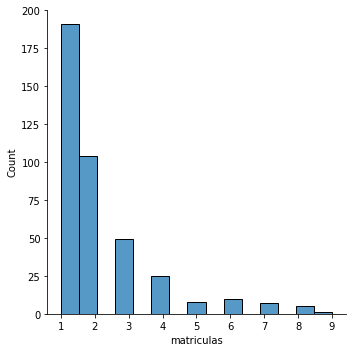

In [ ]:
sns.displot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,7
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,3
132,GABRIELE,72,@dominiodoemail.com.br,gabriele@dominiodoemail.com.br,6
110,LUCIENE,22,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,1


# 6.Selecionando cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
13,BRUNA,34,@servicodoemail.com,bruna@servicodoemail.com,1
76,CRISTIANO,154,@servicodoemail.com,cristiano@servicodoemail.com,3
4,CARLOS,230,@servicodoemail.com,carlos@servicodoemail.com,1
11,GABRIEL,219,@servicodoemail.com,gabriel@servicodoemail.com,2
82,SOLANGE,7,@dominiodoemail.com.br,solange@dominiodoemail.com.br,2


In [ ]:
todas_matriculas = []
x = np.random.rand(20) #gerando resultados nos 20 cursos
prob = x / sum(x)

In [ ]:
#buscando o index e a linha que vamos usar. Ele vai percorrer o dataframe nomes com a função iterrows(ele devolve cada linha do conjunto)
for index, row in nomes.iterrows():
  id = row.id_aluno #a cada elemento encontrado iremos pegar a linha do id_aluno
  matriculas = row.matriculas #a cada elemento encontrado iremos pegar a linha de matriculas
  
  #quando tivermos as informações acima, iremos decidir quantos cursos terão cada aluno
  #buscamos o elemento i no intervalo de 0 até matriculas(maximo)
  for i in range(matriculas): 
    #mat recebe o id do aluno e do curso aleatóriamente com a função np.random.choice()
    #np.random.choice() recebe o parametro do indice do curso e a probabilidade
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
#criamos um dataframe onde o resultado de todas_matriculas serão jogadas no id_aluno e id_curso
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])    

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [ ]:
#agrupamos pelo id_curso fazendo a contagem de matricula, logo fizemos a junção da tabela cursos, pegando o nome do curso em comparação com o id dele
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
80,TAIS,179,@dominiodoemail.com.br,tais@dominiodoemail.com.br,1
116,MARCELA,261,@servicodoemail.com,marcela@servicodoemail.com,2
91,WESLEY,255,@dominiodoemail.com.br,wesley@dominiodoemail.com.br,1


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python


# 7.Saida em diferentes formatos

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,94,Lógica de programação
1,65,Java para Web
2,57,C# para Web
3,51,Ruby on Rails
4,6,Cursos de Python
5,32,PHP com MySql
6,11,.NET para web
7,59,Novas integrações com Java
8,8,TDD com Java
9,48,Código limpo com C#


In [ ]:
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"quantidade_de_alunos":{"1":94,"2":65,"3":57,"4":51,"5":6,"6":32,"7":11,"8":59,"9":8,"10":48,"11":23,"12":37,"13":8,"14":47,"15":70,"16":21,"17":7,"18":92,"19":45,"20":63},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>94</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>65</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>57</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>11</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>59</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>8</td>
  

# 8.Criando o banco sql

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:') #salvando na memoria local
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine) #transformando em sql. primeiro passa o nome da tabela onde vai ficar o parametro e depois o engine

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# 9.Buscando do banco sql

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,6,Cursos de Python
1,7,11,.NET para web
2,9,8,TDD com Java
3,13,8,Persistência com .NET
4,17,7,Internet das coisas


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas.query('quantidade_de_alunos > 40')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
7,Novas integrações com Java,59
9,Código limpo com C#,48
13,Desenvolvendo jogos,47
14,Análise de dados,70
17,Programação funcional,92
18,Boas práticas em Java,45


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


# 10.Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# 11.Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [ ]:
matriculas

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1
...,...,...
839,383,3
840,383,18
841,383,18
842,383,12


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
35,10,16
107,233,16
109,281,16
157,203,16
181,381,16
244,289,16
387,137,16
457,321,16
485,322,16
521,384,16


In [ ]:
nomes.sample()

,nome,id_aluno,dominio,email,matriculas
166,KELLY,109,@dominiodoemail.com.br,kelly@dominiodoemail.com.br,3


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,16,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,2
233,16,ELAINE,@servicodoemail.com,elaine@servicodoemail.com,1
281,16,REGINA,@dominiodoemail.com.br,regina@dominiodoemail.com.br,5
203,16,TATIANE,@dominiodoemail.com.br,tatiane@dominiodoemail.com.br,5
381,16,CRISTINA,@dominiodoemail.com.br,cristina@dominiodoemail.com.br,3
289,16,IVONE,@servicodoemail.com,ivone@servicodoemail.com,1
137,16,DALVA,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,3
321,16,FERNANDO,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,6
322,16,MARCIO,@dominiodoemail.com.br,marcio@dominiodoemail.com.br,4


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
10       MARIANA
233       ELAINE
281       REGINA
203      TATIANE
381     CRISTINA
289        IVONE
137        DALVA
321     FERNANDO
322       MARCIO
384       RENATO
337         ALEX
154    CRISTIANO
66          LUAN
15        VAGNER
44       NICOLAS
271       NILTON
376      AUGUSTO
159      ORLANDO
147     VINICIOS
351      EMANUEL
362      NIVALDO
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
351,EMANUEL
321,FERNANDO
322,MARCIO
362,NIVALDO
381,CRISTINA


# 12.Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,MARIANA
1,ELAINE
2,REGINA
3,TATIANE
4,CRISTINA
5,IVONE
6,DALVA
7,FERNANDO
8,MARCIO
9,RENATO
